<a href="https://colab.research.google.com/github/Eylz-Liu/Mod-le-vol-locale/blob/main/Etude_GSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Tirage Taux court


1.1 Extraction de GSE Taux *court* Yearly


In [26]:
# Étape 1 : Uploader le fichier Excel depuis ton ordinateur
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Étape 2 : Lire le fichier Excel avec pandas
import pandas as pd
import numpy as np

# Remplace par le nom exact du fichier uploadé
filename = "TIRAGES_TXCOURT_Y.xlsx"

# Lire la 2e feuille (index 1) sans en-tête
df = pd.read_excel(filename, sheet_name=0, header=None)

# Étape 3 : Extraire les strikes (première ligne, hors première colonne)

maturities = df.iloc[0, 1:].astype(float).values # .str.replace('%', '').astype(float).values

# Étape 4 : Extraire les maturités (première colonne, hors première ligne)
scenario = df.iloc[1:, 0].astype(float).values
print("T_array (maturities):", maturities.shape)

# Étape 5 : Extraire la matrice IV (le reste du tableau)
TL_matrix = df.iloc[1:, 1:].astype(float).values

# Étape 6 : Afficher les résultats
print("scenario:", scenario)
print("Maturities (years):", maturities)
print("TL Matrix shape:", TL_matrix.shape)
print("TL Matrix (extrait):\n", TL_matrix[:5, :7])  # Affiche un extrait

Saving TIRAGES_TXCOURT_Y.xlsx to TIRAGES_TXCOURT_Y (2).xlsx
T_array (maturities): (42,)
scenario: [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  

1.2 Statistiques descriptives par année ( par colonnes) sur les 1000 scnéarios

Année 1 : Moyenne=0.0255, Médiane=0.0255, Écart-type=0.0000
Année 2 : Moyenne=0.0225, Médiane=0.0220, Écart-type=0.0078
Année 3 : Moyenne=0.0226, Médiane=0.0217, Écart-type=0.0113
Année 4 : Moyenne=0.0245, Médiane=0.0231, Écart-type=0.0144
Année 5 : Moyenne=0.0251, Médiane=0.0231, Écart-type=0.0169
Année 6 : Moyenne=0.0260, Médiane=0.0236, Écart-type=0.0190
Année 7 : Moyenne=0.0270, Médiane=0.0243, Écart-type=0.0201
Année 8 : Moyenne=0.0277, Médiane=0.0245, Écart-type=0.0224
Année 9 : Moyenne=0.0281, Médiane=0.0246, Écart-type=0.0237
Année 10 : Moyenne=0.0293, Médiane=0.0255, Écart-type=0.0250
Année 11 : Moyenne=0.0299, Médiane=0.0255, Écart-type=0.0274
Année 12 : Moyenne=0.0310, Médiane=0.0262, Écart-type=0.0288
Année 13 : Moyenne=0.0322, Médiane=0.0266, Écart-type=0.0323
Année 14 : Moyenne=0.0326, Médiane=0.0262, Écart-type=0.0342
Année 15 : Moyenne=0.0321, Médiane=0.0255, Écart-type=0.0345
Année 16 : Moyenne=0.0309, Médiane=0.0240, Écart-type=0.0352
Année 17 : Moyenne=0.0302, Médian

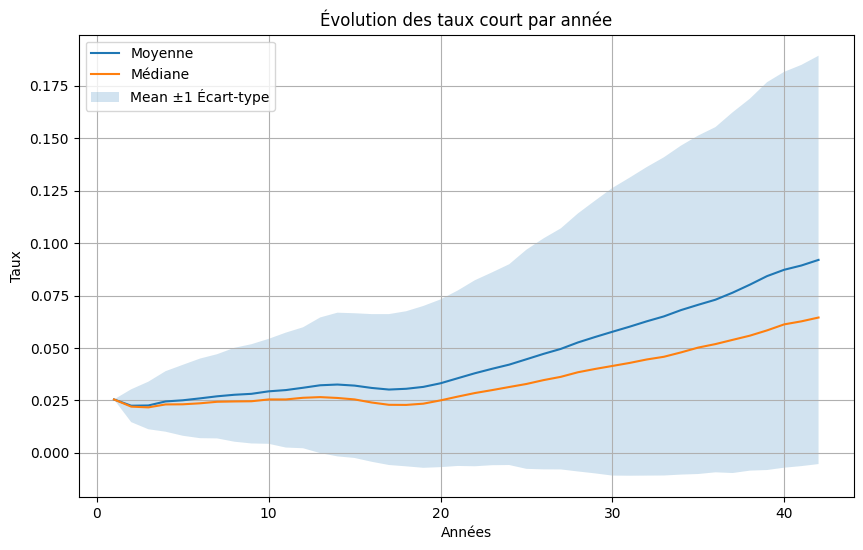

In [27]:
#*******************************************************************
# 1.2.1 - Moyenne, médiane, écart-type par année
#*******************************************************************
mean_by_year = np.mean(TL_matrix, axis=0)
median_by_year = np.median(TL_matrix, axis=0)
std_by_year = np.std(TL_matrix, axis=0)

# 1.2.2 Visualisation des tendance
for i, year in enumerate(maturities):
    print(f"Année {year:.0f} : Moyenne={mean_by_year[i]:.4f}, Médiane={median_by_year[i]:.4f}, Écart-type={std_by_year[i]:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(maturities, mean_by_year, label='Moyenne')
plt.plot(maturities, median_by_year, label='Médiane')
plt.fill_between(maturities, mean_by_year - std_by_year, mean_by_year + std_by_year, alpha=0.2, label='Mean ±1 Écart-type')
plt.title("Évolution des taux court par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.show()

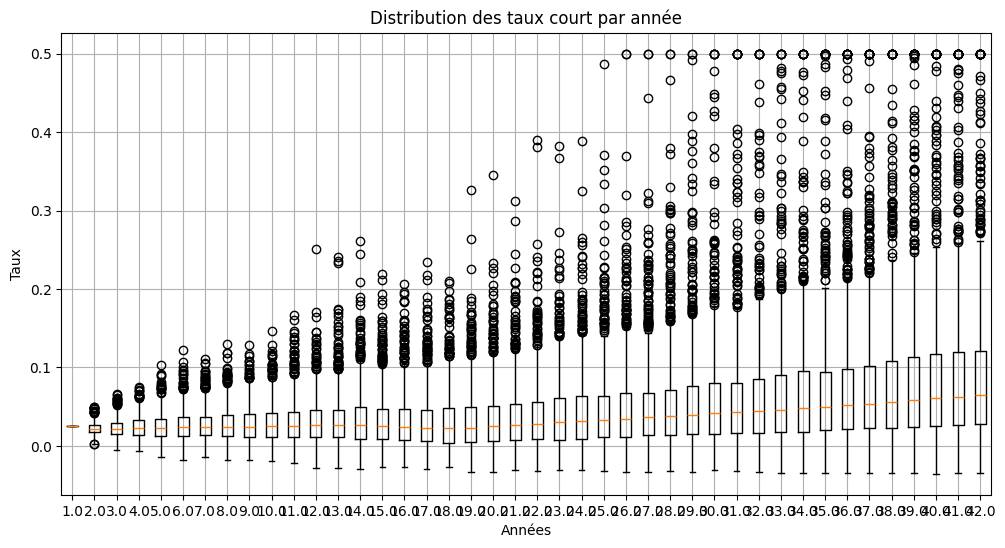

/tmp/ipython-input-4122904940.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Année', y='Taux', data=df_long, palette='coolwarm')


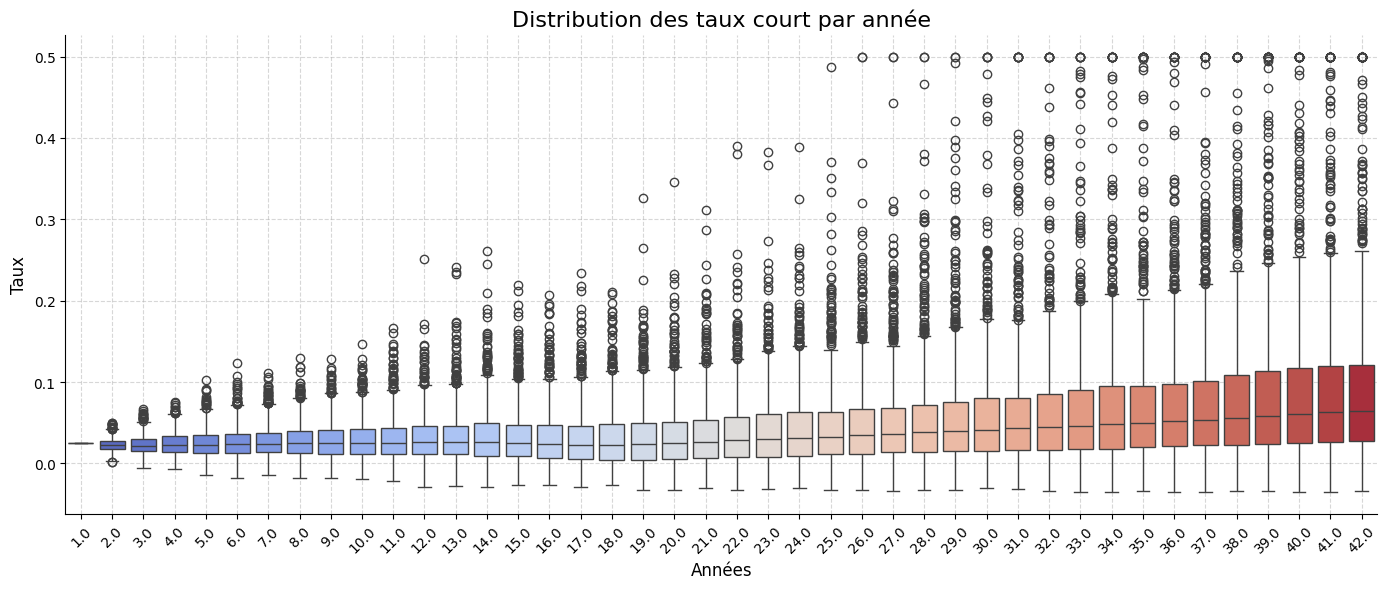

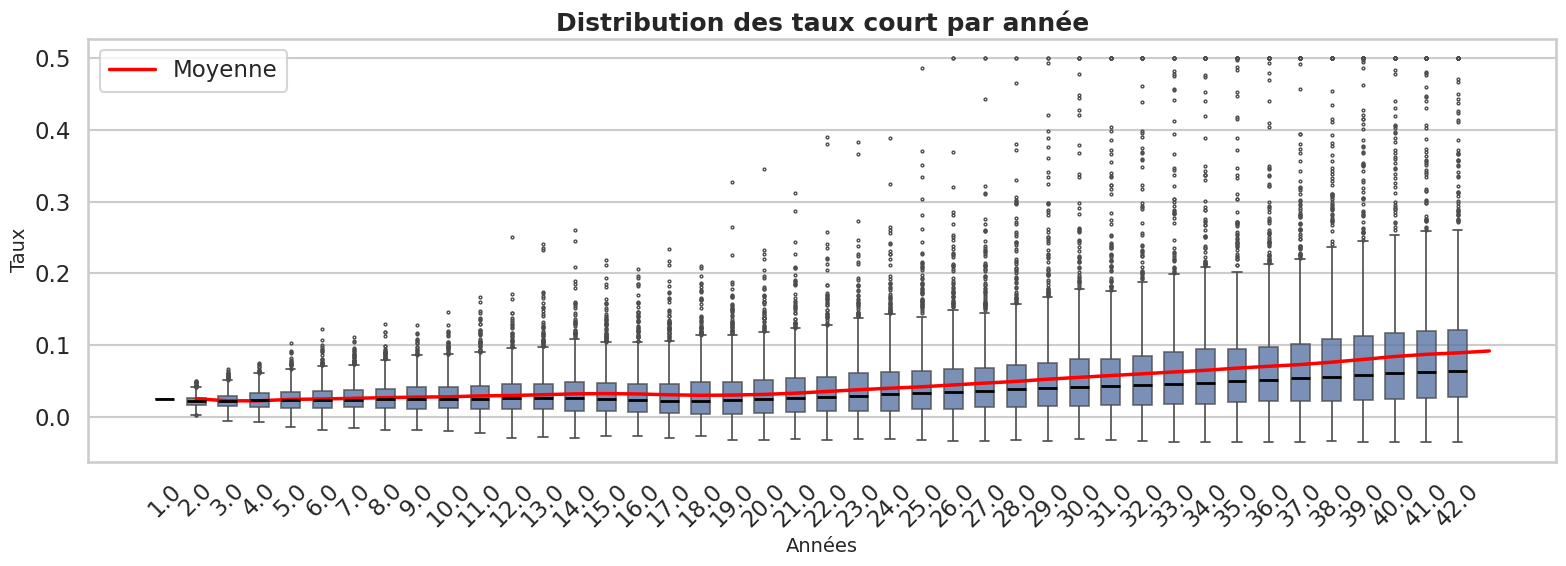

In [29]:
#  1.2.3. Boxplots pour visualiser la dispersion
plt.figure(figsize=(12, 6))
plt.boxplot(TL_matrix, positions=maturities, widths=0.5)
plt.title("Distribution des taux court par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.grid(True)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir TL_matrix en DataFrame pour seaborn
df_box = pd.DataFrame(TL_matrix, columns=maturities)

# Transformation en format long (année, taux)
df_long = df_box.melt(var_name='Année', value_name='Taux')

# Tracer le boxplot avec seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(x='Année', y='Taux', data=df_long, palette='coolwarm')

# Améliorations visuelles
plt.title("Distribution des taux court par année", fontsize=16)
plt.xlabel("Années", fontsize=12)
plt.ylabel("Taux", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir TL_matrix en DataFrame
df_box = pd.DataFrame(TL_matrix, columns=maturities)

# Format long pour seaborn
df_long = df_box.melt(var_name='Année', value_name='Taux')

# Définir un style élégant
sns.set(style="whitegrid", context="talk", palette="deep")

# Créer le graphique
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    x='Année',
    y='Taux',
    data=df_long,
    width=0.6,
    linewidth=1.2,
    fliersize=2,
    boxprops=dict(alpha=0.8),
    medianprops=dict(color="black", linewidth=2)
)

# Ajouter une ligne de moyenne par année
mean_values = df_box.mean().values
sns.lineplot(x=maturities, y=mean_values, color='red', label='Moyenne', linewidth=2.5)

# Personnalisation
plt.title("Distribution des taux court par année", fontsize=18, weight='bold')
plt.xlabel("Années", fontsize=14)
plt.ylabel("Taux", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

1.3 Analyse par scénario / par ligne sur 40ans de projection

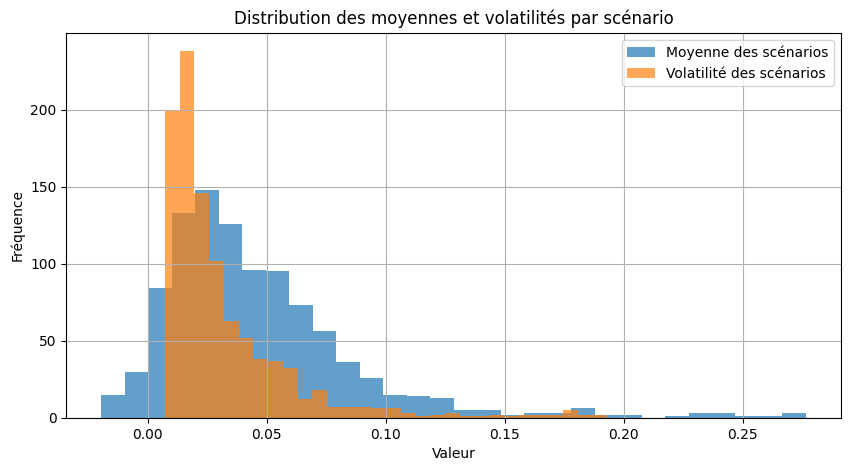

In [8]:
mean_by_scenario = np.mean(TL_matrix, axis=1)
std_by_scenario = np.std(TL_matrix, axis=1)

plt.figure(figsize=(10, 5))
plt.hist(mean_by_scenario, bins=30, alpha=0.7, label='Moyenne des scénarios')
plt.hist(std_by_scenario, bins=30, alpha=0.7, label='Volatilité des scénarios')
plt.title("Distribution des moyennes et volatilités par scénario")
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

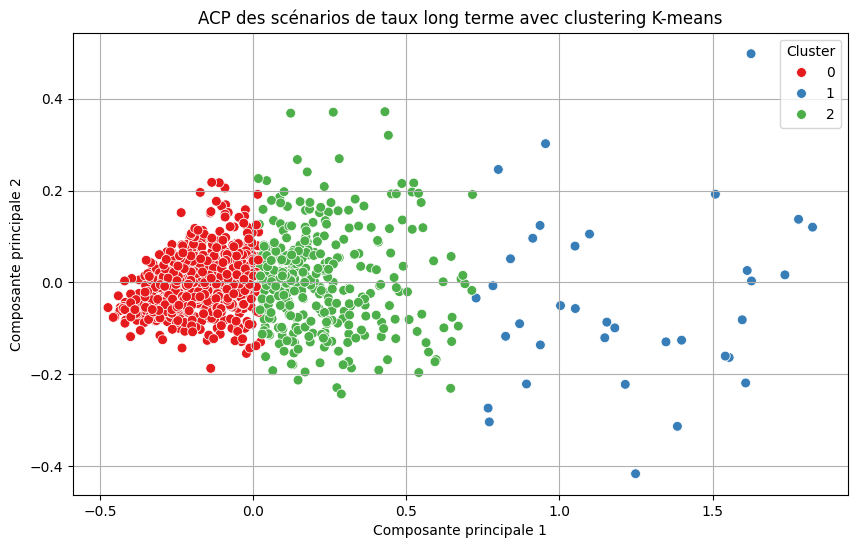

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Étape 1 : ACP (réduction à 2 dimensions)
pca = PCA(n_components=2)
TL_pca = pca.fit_transform(TL_matrix)

# Étape 2 : Clustering K-means (3 groupes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(TL_matrix)

# Étape 3 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=TL_pca[:, 0], y=TL_pca[:, 1], hue=clusters, palette='Set1', s=50)
plt.title("ACP des scénarios de taux court terme avec clustering K-means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

1.4 Quantiles Par année

Quantiles par année :
          1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
0.05  0.025454  0.010726  0.005859  0.002857  0.000834 -0.000085 -0.000758   
0.25  0.025454  0.017316  0.014654  0.014308  0.013143  0.012718  0.013383   
0.50  0.025454  0.022033  0.021679  0.023082  0.023141  0.023616  0.024346   
0.75  0.025454  0.027094  0.029506  0.033117  0.034803  0.036510  0.037332   
0.95  0.025454  0.035565  0.042258  0.051583  0.055923  0.059415  0.063292   

          8.0       9.0       10.0  ...      33.0      34.0      35.0  \
0.05 -0.002999 -0.004026 -0.004382  ... -0.007852 -0.008227 -0.006702   
0.25  0.012227  0.011074  0.011908  ...  0.017473  0.018210  0.020436   
0.50  0.024501  0.024595  0.025458  ...  0.045795  0.047891  0.050186   
0.75  0.039337  0.041267  0.042131  ...  0.090317  0.095084  0.094754   
0.95  0.069372  0.072595  0.076657  ...  0.190816  0.208291  0.202140   

          36.0      37.0      38.0      39.0      40.0      41.0      

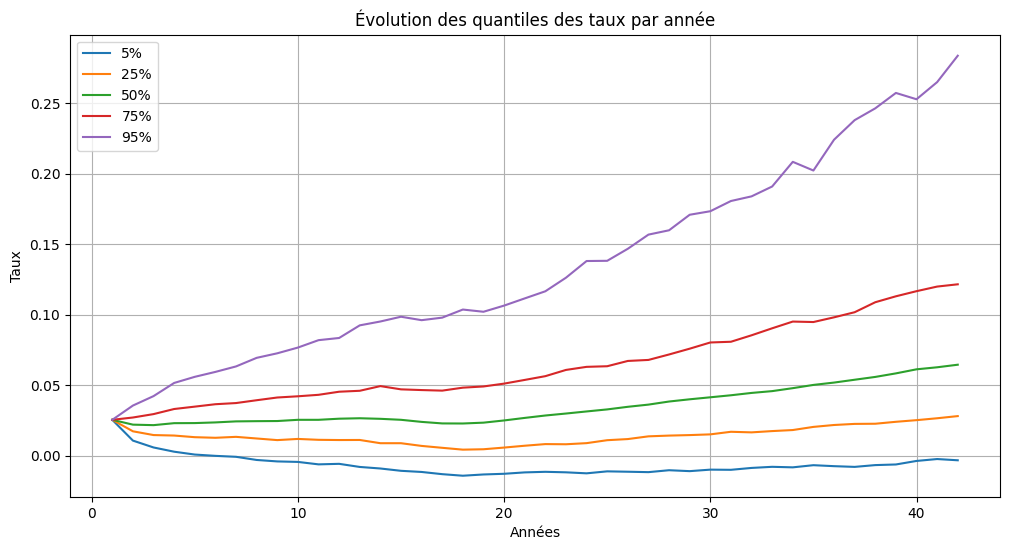

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Définir les niveaux de quantiles
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]

# Créer un DataFrame pour stocker les quantiles
quantile_df = pd.DataFrame(index=quantile_levels, columns=maturities)

# Calculer les quantiles pour chaque année
for i, year in enumerate(maturities):
    quantile_df[year] = np.quantile(TL_matrix[:, i], quantile_levels)

# Afficher les quantiles
print("Quantiles par année :")
print(quantile_df)

plt.figure(figsize=(12, 6))
for q in quantile_levels:
    plt.plot(maturities, quantile_df.loc[q], label=f"{int(q*100)}%")

plt.title("Évolution des quantiles des taux par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.show()

# Section 2 - TX1M exportation pour contrôle annuel

In [23]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()  # Choisis le fichier SXE5 OVDV 1211.xlsx

# Étape 1 : Charger le fichier Excel
filename = "TX1M.xlsx"  # Remplace par le nom réel
df_raw = pd.read_excel(filename, header=None)

# Étape 2 : Renommer les colonnes pour plus de clarté
df_raw.columns = ['Scenario', 'Year', 'Rate']

# Étape 3 : Pivot pour transformer en format matriciel (ligne = scénario, colonne = année)
df_pivot= df_raw.pivot(index='Scenario', columns='Year', values='Rate')

# Étape 4 : Trier les colonnes par année si nécessaire
# df_pivot = df_pivot.sort_index(axis=1)

# Étape 5 : Afficher un extrait
print("DataFrame formaté :")
print(df_pivot.head())

# Étape 6 : Afficher les résultats
print("Colonnes (années) :")
# print(df_pivot.columns.tolist())


print("\nLignes (scénarios) :")
print(df_pivot.index.tolist())

#print("\nValeurs de la DataFrame :")
#print(df_pivot.values)

# 📐 Afficher la forme de la DataFrame
print("\nShape de df_pivot :")
print(df_pivot.shape)  # (nombre de scénarios, nombre d'années)


Saving TX1M.xlsx to TX1M (4).xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


DataFrame formaté :
Year            1         2         3         4         5         6   \
Scenario                                                               
1         0.042039  0.045665  0.027949  0.014793  0.010239  0.011080   
2         0.007068  0.003554  0.018404  0.032580  0.039898  0.040536   
3         0.019837  0.011307  0.007155  0.008456  0.019333  0.013830   
4         0.025008  0.033320  0.043539  0.041687  0.027969  0.036569   
5         0.013052  0.007143  0.010865  0.014707  0.023030  0.027487   

Year            7         8         9         10  ...        32        33  \
Scenario                                          ...                       
1         0.021787  0.022351  0.014414  0.005827  ...  0.003717  0.014494   
2         0.027233  0.026828  0.038217  0.052504  ...  0.124299  0.100189   
3         0.015186  0.019934  0.011358  0.015234  ... -0.013860 -0.010737   
4         0.035119  0.029494  0.042691  0.037418  ...  0.222969  0.211025   
5         0.0

Statistiques par année :
Année 1 : Moyenne=0.0228, Médiane=0.0224, Écart-type=0.0079
Année 2 : Moyenne=0.0223, Médiane=0.0214, Écart-type=0.0113
Année 3 : Moyenne=0.0244, Médiane=0.0230, Écart-type=0.0144
Année 4 : Moyenne=0.0250, Médiane=0.0231, Écart-type=0.0169
Année 5 : Moyenne=0.0259, Médiane=0.0235, Écart-type=0.0190
Année 6 : Moyenne=0.0269, Médiane=0.0243, Écart-type=0.0201
Année 7 : Moyenne=0.0277, Médiane=0.0245, Écart-type=0.0224
Année 8 : Moyenne=0.0281, Médiane=0.0246, Écart-type=0.0237
Année 9 : Moyenne=0.0292, Médiane=0.0253, Écart-type=0.0250
Année 10 : Moyenne=0.0299, Médiane=0.0255, Écart-type=0.0274
Année 11 : Moyenne=0.0309, Médiane=0.0262, Écart-type=0.0288
Année 12 : Moyenne=0.0322, Médiane=0.0265, Écart-type=0.0323
Année 13 : Moyenne=0.0326, Médiane=0.0262, Écart-type=0.0343
Année 14 : Moyenne=0.0321, Médiane=0.0257, Écart-type=0.0346
Année 15 : Moyenne=0.0311, Médiane=0.0241, Écart-type=0.0353
Année 16 : Moyenne=0.0302, Médiane=0.0229, Écart-type=0.0360
Année 17

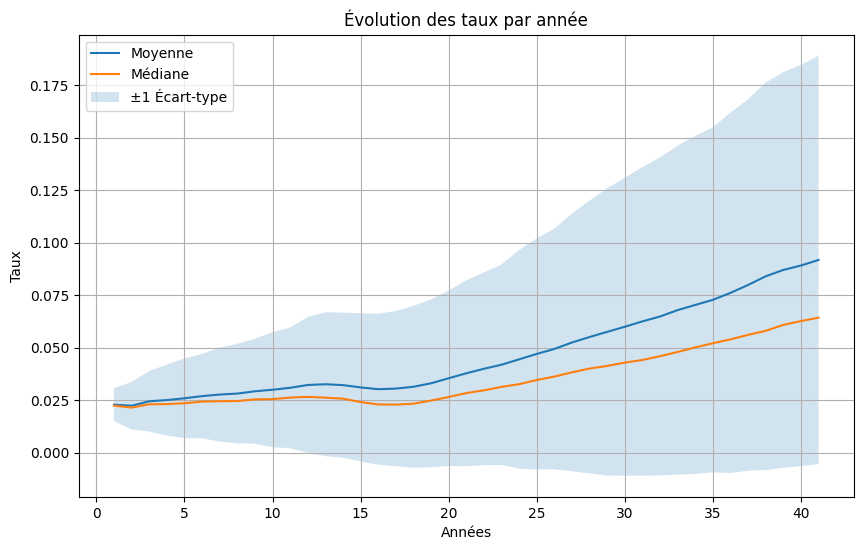

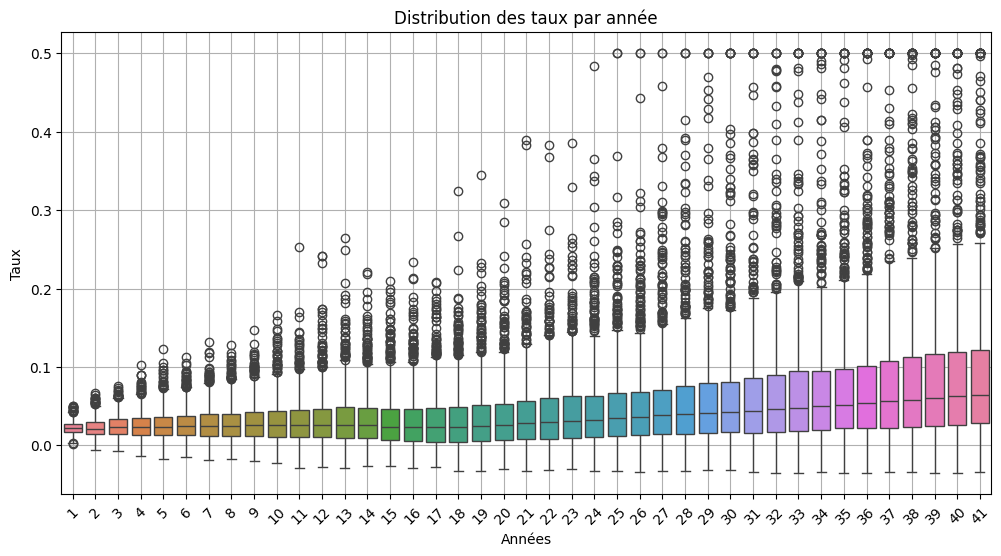


Quantiles par année :
Year        1         2         3         4         5         6         7   \
0.05  0.010818  0.005934  0.002777  0.000903 -0.000484 -0.000742 -0.002877   
0.25  0.017666  0.014253  0.014180  0.013387  0.012624  0.013148  0.012098   
0.50  0.022374  0.021431  0.023010  0.023118  0.023519  0.024299  0.024463   
0.75  0.027426  0.029454  0.033123  0.034433  0.036420  0.037520  0.039462   
0.95  0.036252  0.041488  0.051530  0.055719  0.060017  0.063017  0.068955   

Year        8         9         10  ...        32        33        34  \
0.05 -0.003615 -0.004583 -0.006517  ... -0.007754 -0.008389 -0.006839   
0.25  0.011458  0.011738  0.011102  ...  0.017466  0.018081  0.020124   
0.50  0.024555  0.025349  0.025482  ...  0.045926  0.047930  0.050120   
0.75  0.040628  0.042135  0.043492  ...  0.089889  0.094583  0.094321   
0.95  0.071262  0.076619  0.083360  ...  0.187084  0.209126  0.201775   

Year        35        36        37        38        39        40     

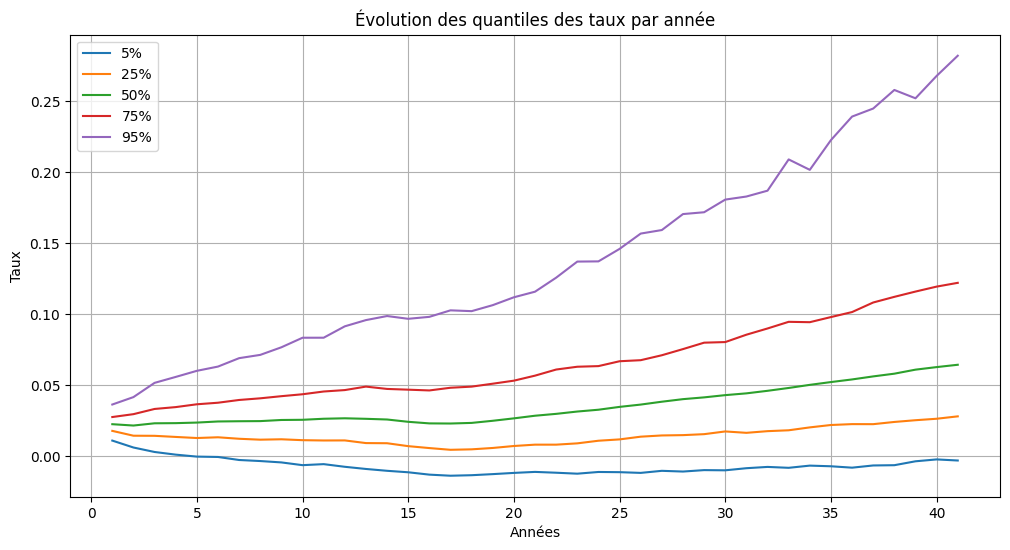

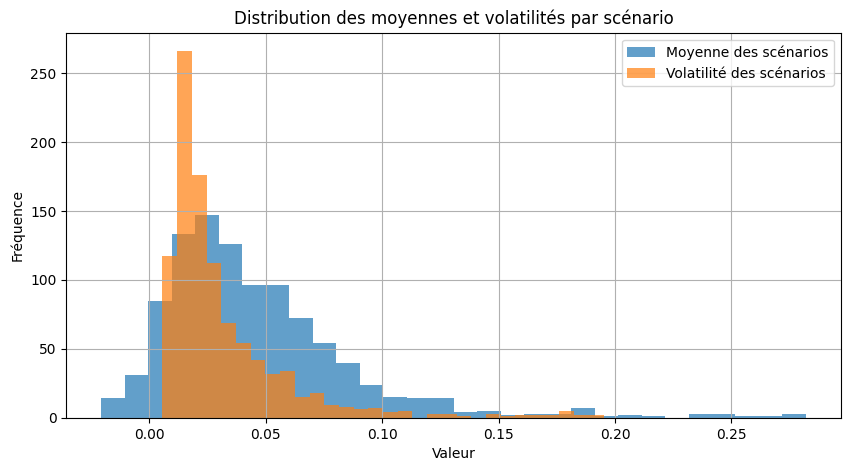

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ton DataFrame est déjà prêt sous le nom df_pivot
# Lignes = scénarios, Colonnes = années

# 1. Statistiques descriptives par année
mean_by_year = df_pivot.mean(axis=0)
median_by_year = df_pivot.median(axis=0)
std_by_year = df_pivot.std(axis=0)

# 2. Affichage des statistiques
print("Statistiques TX1M par année :")
for year in df_pivot.columns:
    print(f"Année {year} : Moyenne={mean_by_year[year]:.4f}, Médiane={median_by_year[year]:.4f}, Écart-type={std_by_year[year]:.4f}")

# 3. Visualisation des tendances
plt.figure(figsize=(10, 6))
plt.plot(df_pivot.columns, mean_by_year, label='Moyenne')
plt.plot(df_pivot.columns, median_by_year, label='Médiane')
plt.fill_between(df_pivot.columns, mean_by_year - std_by_year, mean_by_year + std_by_year, alpha=0.2, label='Mean ±1 Écart-type')
plt.title("Évolution des taux TX1M par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.show()

# 4. Boxplots par année
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pivot, orient='v')
plt.title("Boxplot - Distribution des taux TX1M par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Quantiles par année
quantile_levels = [0.05, 0.25, 0.5, 0.75, 0.95]
quantile_df = df_pivot.quantile(q=quantile_levels)

print("\nQuantiles par année :")
print(quantile_df)

# 6. Visualisation des quantiles
plt.figure(figsize=(12, 6))
for q in quantile_levels:
    plt.plot(df_pivot.columns, quantile_df.loc[q], label=f"{int(q*100)}%")
plt.title("Évolution des quantiles des taux TX1M par année")
plt.xlabel("Années")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.show()

# 7. Analyse par scénario
mean_by_scenario = df_pivot.mean(axis=1)
std_by_scenario = df_pivot.std(axis=1)

plt.figure(figsize=(10, 5))
plt.hist(mean_by_scenario, bins=30, alpha=0.7, label='Moyenne des scénarios')
plt.hist(std_by_scenario, bins=30, alpha=0.7, label='Volatilité des scénarios')
plt.title("Distribution des moyennes et volatilités par scénario")
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()